# Explorar las ofertas relámpago, ¿qué insights puedes generar?

## Descripción
En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.
Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
    
## Objetivo
Hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

## Importando las bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importando los datos

In [4]:
df_offer = pd.read_csv("ofertas_relampago.csv")

In [6]:
df_offer

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


## Tratamiento de los datos

In [9]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [11]:
# Tratamiento de las columnas de fecha

df_offer['OFFER_START_DATE'] = pd.to_datetime(df_offer['OFFER_START_DATE'], format='%Y-%m-%d')

df_offer['OFFER_START_DTTM'] = df_offer['OFFER_START_DTTM'].apply(lambda x: x[:-6])
df_offer['OFFER_FINISH_DTTM'] = df_offer['OFFER_FINISH_DTTM'].apply(lambda x: x[:-6])

df_offer['OFFER_START_DTTM'] = pd.to_datetime(df_offer['OFFER_START_DTTM'], format='%Y-%m-%d %H:%M:%S')
df_offer['OFFER_FINISH_DTTM'] = pd.to_datetime(df_offer['OFFER_FINISH_DTTM'], format='%Y-%m-%d %H:%M:%S')

In [13]:
# Creando columnas que muestran la duración de las promociones en minutos y horas

df_offer['OFFER_DURATION_MINUTES'] = (df_offer['OFFER_FINISH_DTTM'] - df_offer['OFFER_START_DTTM']).dt.total_seconds() / 60

df_offer['OFFER_DURATION_HOURS'] = df_offer['OFFER_DURATION_MINUTES']/60

Se crearon las columnas de duración de la promoción en minutos y horas para entender si existe disparidad en la duración entre las promociones.

In [16]:
# Creación de la columna que indica a qué hora se lanzó la promoción

df_offer['OFFER_START_HOUR'] = df_offer['OFFER_START_DTTM'].dt.hour

Esta columna fue creada para verificar la hora de lanzamiento de la promoción

In [19]:
# Los valores nulos de las variables SOLD_AMOUNT y SOLD_QUANTITY pueden ser completados con valores 0, ya que representan la ausencia de venta del determinado artículo.

df_offer['SOLD_AMOUNT'] = df_offer['SOLD_AMOUNT'].fillna(0)

df_offer['SOLD_QUANTITY'] = df_offer['SOLD_QUANTITY'].fillna(0)

In [21]:
# Creación de la columna que indica el porcentaje de productos de la promoción que fueron vendidos

df_offer['PERC_SOLD_QUANTITY'] = df_offer['SOLD_QUANTITY']/df_offer['INVOLVED_STOCK'] *100

La creación de esta variable permite entender el porcentaje de la cantidad de productos destinados a la promoción que fueron efectivamente comprados.

## Análisis univariado

In [25]:
df_offer.describe()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_DURATION_MINUTES,OFFER_DURATION_HOURS,OFFER_START_HOUR,PERC_SOLD_QUANTITY
count,48746,48746,48746,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000
mean,2021-07-05 11:24:49.008328704,2021-07-06 00:35:32.408813056,2021-07-06 06:18:02.448713984,35.007508,30.565216,25.820857,5.471382,342.500665,5.708344,13.178722,20.673473
min,2021-06-01 00:00:00,2021-06-01 07:00:00,2021-06-01 07:00:00,1.000000,-192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-06-22 00:00:00,2021-06-22 15:00:00,2021-06-22 21:22:13,5.000000,4.000000,0.000000,0.000000,360.000000,6.000000,7.000000,0.000000
50%,2021-07-07 00:00:00,2021-07-07 18:00:00,2021-07-08 00:00:00,10.000000,8.000000,1.000000,1.000000,360.033333,6.000556,13.000000,1.000000
75%,2021-07-21 00:00:00,2021-07-21 12:00:00,2021-07-21 15:03:39.750000128,15.000000,15.000000,12.590000,3.000000,360.266667,6.004444,19.000000,25.000000
max,2021-07-31 00:00:00,2021-07-31 19:00:00,2021-08-01 03:00:00,9000.000000,8635.000000,4836.570000,1646.000000,6285.150000,104.752500,23.000000,1380.000000
std,NaN,NaN,NaN,206.761058,195.813806,127.051542,32.743776,126.785767,2.113096,4.511976,35.320409


Esta tabla nos da información sobre la base de datos; se trata de una base con 48.746 promociones relámpago comprendidas entre los meses de junio y julio de 2021. Aquí tenemos las medidas de centralidad de cada una de las columnas numéricas de la base de datos. Entraremos en el detalle de cada una de las variables a continuación, pero lo que llama la atención es el hecho de que la columna REMAINING_STOCK_AFTER_END tiene valores negativos, lo que demuestra que hay casos en los que se vende una cantidad mayor que la que fue destinada a la promoción.

### Variable INVOLVED_STOCK

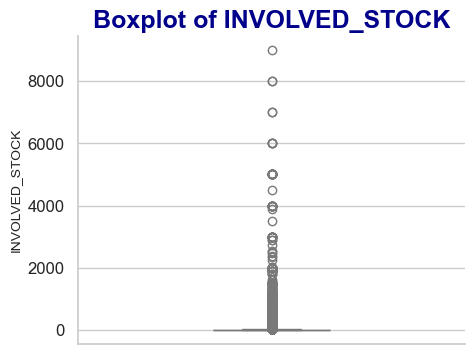

In [29]:
# Establecer el estilo estético de los gráficos
sns.set(style="whitegrid", palette="muted")

# Crear el diagrama de caja para la columna 'Values'
plt.figure(figsize=(5, 4))
sns.boxplot(y=df_offer['INVOLVED_STOCK'], color="lightblue", width=0.3)

# Personalizar el título y las etiquetas
plt.title("Boxplot of INVOLVED_STOCK", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("INVOLVED_STOCK", fontsize=10)

# Personalizar tick labels
plt.yticks(fontsize=12)

# Eliminar los bordes superior y derecho para una apariencia más limpia
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

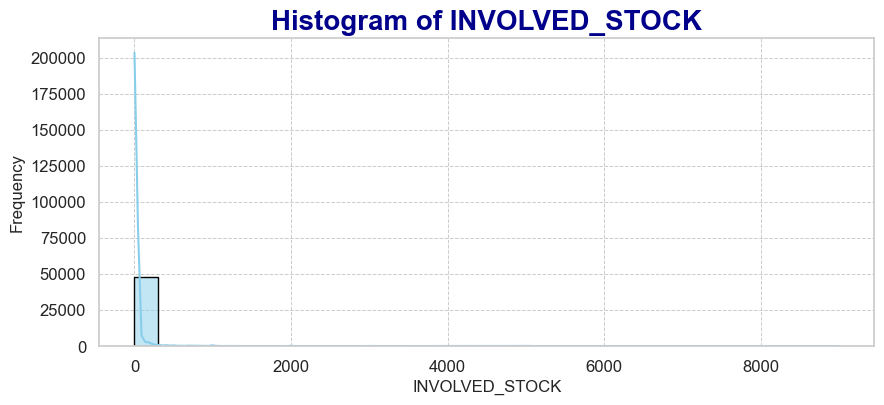

In [31]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_offer['INVOLVED_STOCK'], bins=30, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of INVOLVED_STOCK", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("INVOLVED_STOCK", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

In [33]:
# Eliminar outlier

# Calcular Q1 (25th percentile) y Q3 (75th percentile)
Q1 = df_offer['INVOLVED_STOCK'].quantile(0.25)
Q3 = df_offer['INVOLVED_STOCK'].quantile(0.75)

# Calcular el Interquartile Range (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers_involved_stock = df_offer[(df_offer['INVOLVED_STOCK'] >= lower_bound) & (df_offer['INVOLVED_STOCK'] <= upper_bound)]

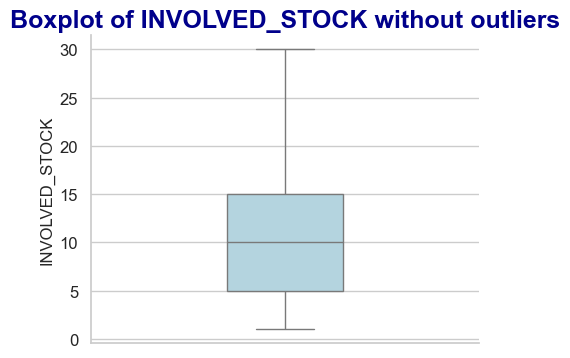

In [35]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_no_outliers_involved_stock['INVOLVED_STOCK'], color="lightblue", width=0.3)

plt.title("Boxplot of INVOLVED_STOCK without outliers", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("INVOLVED_STOCK", fontsize=12)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

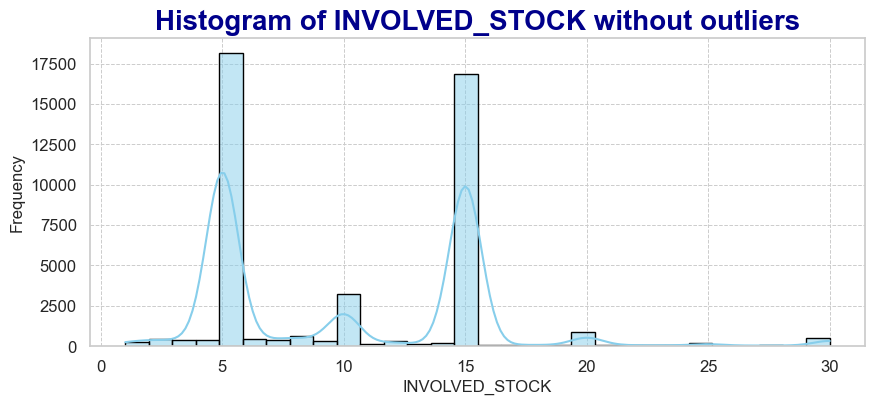

In [37]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_no_outliers_involved_stock['INVOLVED_STOCK'], bins=30, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of INVOLVED_STOCK without outliers", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("INVOLVED_STOCK", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

El análisis de esta variable nos permite ver que existen pocas promociones con stocks bastante altos, llamados outliers. Cuando se eliminan los outliers del análisis, podemos ver que en general los stocks de las promociones varían entre 1 y 30 unidades, siendo más comunes los stocks de 5 y 15 unidades y una mediana de 10 unidades. 


### Variable REMAINING_STOCK_AFTER_END

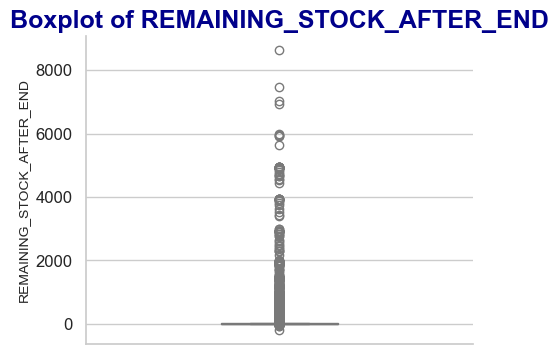

In [41]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_offer['REMAINING_STOCK_AFTER_END'], color="lightblue", width=0.3)

plt.title("Boxplot of REMAINING_STOCK_AFTER_END", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("REMAINING_STOCK_AFTER_END", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

In [43]:
# Eliminar outlier

# Calcular Q1 (25th percentile) y Q3 (75th percentile)
Q1 = df_offer['REMAINING_STOCK_AFTER_END'].quantile(0.25)
Q3 = df_offer['REMAINING_STOCK_AFTER_END'].quantile(0.75)

# Calcular el Interquartile Range (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers_remaining_stock = df_offer[(df_offer['REMAINING_STOCK_AFTER_END'] >= lower_bound) & (df_offer['REMAINING_STOCK_AFTER_END'] <= upper_bound)]

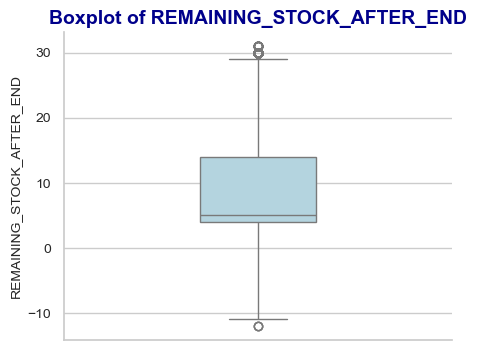

In [45]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_no_outliers_remaining_stock['REMAINING_STOCK_AFTER_END'], color="lightblue", width=0.3)

plt.title("Boxplot of REMAINING_STOCK_AFTER_END", fontsize=14, weight='bold', color='darkblue')
plt.ylabel("REMAINING_STOCK_AFTER_END", fontsize=10)

plt.yticks(fontsize=10)

sns.despine(top=True, right=True)

plt.show()

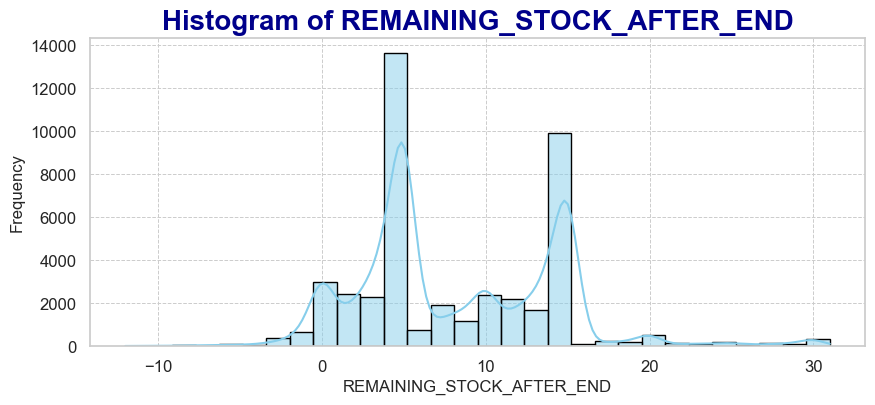

In [47]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_no_outliers_remaining_stock['REMAINING_STOCK_AFTER_END'], bins=30, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of REMAINING_STOCK_AFTER_END", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("REMAINING_STOCK_AFTER_END", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

A través de esta variable podemos ver la cantidad de productos que sobran en el stock cuando estas promociones terminan. Tenemos outliers por arriba y algunos pocos valores negativos, pero en general estas sobras están en el rango de 1 a 15 unidades, siendo más frecuentes las cantidades de 5 y 15.

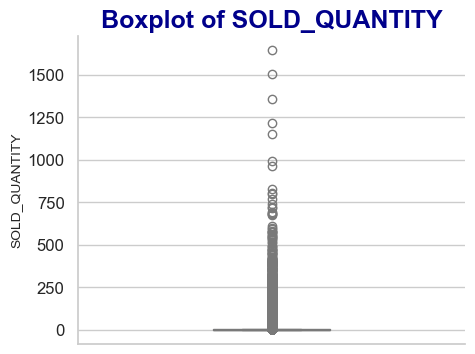

In [50]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_offer['SOLD_QUANTITY'], color="lightblue", width=0.3)

plt.title("Boxplot of SOLD_QUANTITY", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("SOLD_QUANTITY", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

In [52]:
# Eliminar outlier

# Calcular Q1 (25th percentile) y Q3 (75th percentile)
Q1 = df_offer['SOLD_QUANTITY'].quantile(0.25)
Q3 = df_offer['SOLD_QUANTITY'].quantile(0.75)

# Calcular el Interquartile Range (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers_sold_quantity = df_offer[(df_offer['SOLD_QUANTITY'] >= lower_bound) & (df_offer['SOLD_QUANTITY'] <= upper_bound)]

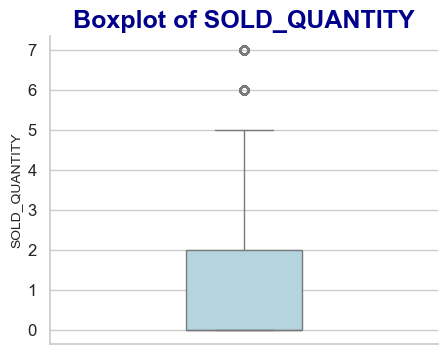

In [54]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_no_outliers_sold_quantity['SOLD_QUANTITY'], color="lightblue", width=0.3)

plt.title("Boxplot of SOLD_QUANTITY", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("SOLD_QUANTITY", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

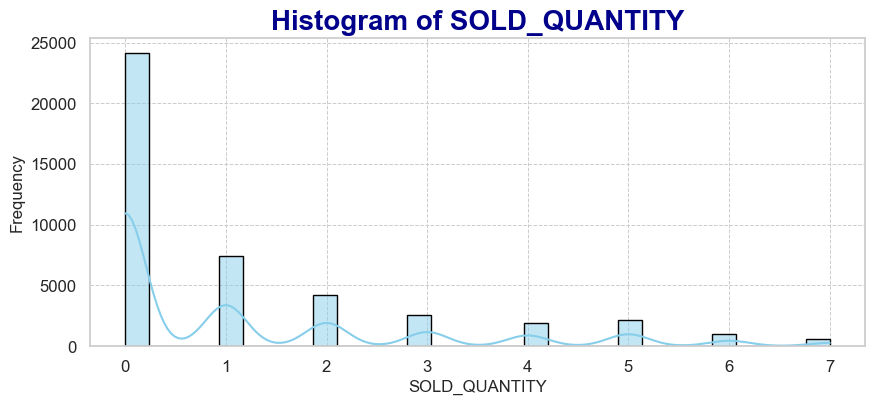

In [56]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_no_outliers_sold_quantity['SOLD_QUANTITY'], bins=30, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of SOLD_QUANTITY", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("SOLD_QUANTITY", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

A través de esta variable SOLD_QUANTITY es posible percibir cuál es la cantidad de producto que se compra en cada promoción, y en muchas de ellas no se vende ninguna unidad. Sería interesante verificar con atención estas promociones en las que no se vende ninguna unidad para entender si estas promociones están dirigidas al público correcto, y si el horario en que se lanzan es un buen horario para el público específico que consumiría este producto.

### Variable PERC_SOLD_QUANTITY

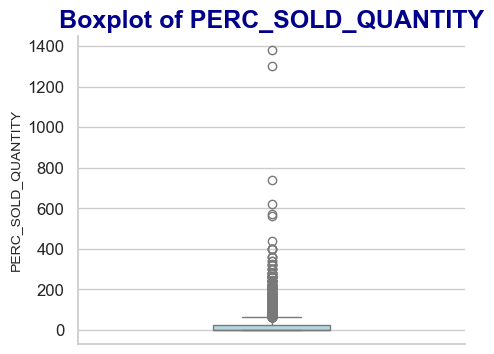

In [60]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_offer['PERC_SOLD_QUANTITY'], color="lightblue", width=0.3)

plt.title("Boxplot of PERC_SOLD_QUANTITY", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("PERC_SOLD_QUANTITY", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

In [72]:
# ¿Cuál es el porcentaje de ofertas que superan el límite de stock de la promoción?

percentual_ultrapassando = len(df_offer[df_offer['PERC_SOLD_QUANTITY']>100])/len(df_offer) * 100

print(f"O percentual de ofertas que ultrapassam o limite de estoque é: {percentual_ultrapassando:.2f}%")

O percentual de ofertas que ultrapassam o limite de estoque é: 2.54%


In [74]:
len(df_offer[df_offer['PERC_SOLD_QUANTITY']>100])

1239

Aquí es importante resaltar que 1.239 promociones, es decir, el 2.54% de las promociones, terminan con stock negativo. Es una cantidad pequeña en comparación con el total, pero si por alguna razón este tipo de fenómeno genera un gran costo para la empresa, vale la pena investigar cuándo ocurren estos casos y mitigar el riesgo, tal vez reduciendo la duración de la promoción para estos tipos de productos.

In [77]:
# Eliminar outlier

# Calcular Q1 (25th percentile) y Q3 (75th percentile)
Q1 = df_offer['PERC_SOLD_QUANTITY'].quantile(0.25)
Q3 = df_offer['PERC_SOLD_QUANTITY'].quantile(0.75)

# Calcular el Interquartile Range (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers_sold_quantity = df_offer[(df_offer['PERC_SOLD_QUANTITY'] >= lower_bound) & (df_offer['PERC_SOLD_QUANTITY'] <= upper_bound)]

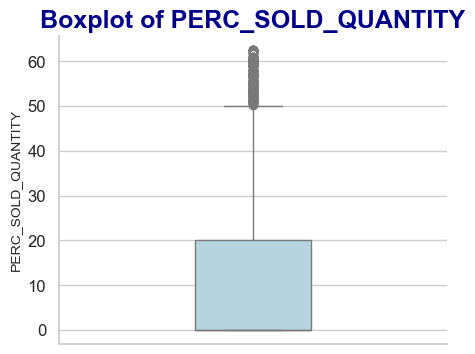

In [79]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_no_outliers_sold_quantity['PERC_SOLD_QUANTITY'], color="lightblue", width=0.3)

plt.title("Boxplot of PERC_SOLD_QUANTITY", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("PERC_SOLD_QUANTITY", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

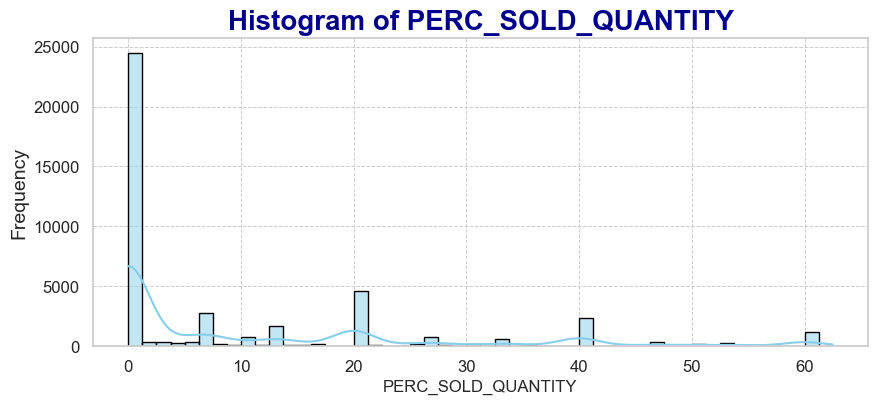

In [81]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_no_outliers_sold_quantity['PERC_SOLD_QUANTITY'], bins=50, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of PERC_SOLD_QUANTITY", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("PERC_SOLD_QUANTITY", fontsize=12)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

Con esta visualización podemos observar que generalmente hasta el 60% del stock destinado a la promoción es realmente comprado. Y como vimos anteriormente, en muchas promociones no se compra ningún artículo, pero cuando hay compras, el porcentaje más frecuente de productos comprados en relación con el inventario reservado es del 20%.

### Variable OFFER_DURATION_HOURS

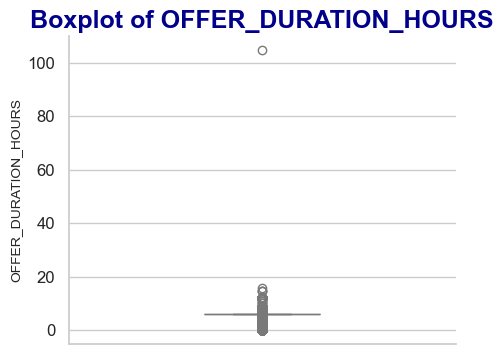

In [85]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_offer['OFFER_DURATION_HOURS'], color="lightblue", width=0.3)

plt.title("Boxplot of OFFER_DURATION_HOURS", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("OFFER_DURATION_HOURS", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

Tenemos un outlier de solo una promoción que superó las 100 horas de duración; vamos a excluir el outlier para entender el comportamiento general.

In [88]:
# Eliminar outlier

# Calcular Q1 (25th percentile) y Q3 (75th percentile)
Q1 = df_offer['OFFER_DURATION_HOURS'].quantile(0.25)
Q3 = df_offer['OFFER_DURATION_HOURS'].quantile(0.75)

# Calcular el Interquartile Range (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers_duration_hours = df_offer[(df_offer['OFFER_DURATION_HOURS'] >= lower_bound) & (df_offer['OFFER_DURATION_HOURS'] <= upper_bound)]

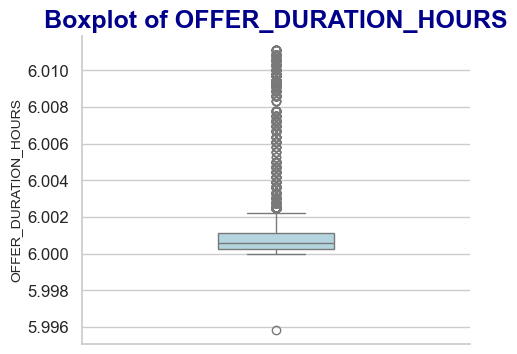

In [90]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(5, 4))
sns.boxplot(y=df_no_outliers_duration_hours['OFFER_DURATION_HOURS'], color="lightblue", width=0.3)

plt.title("Boxplot of OFFER_DURATION_HOURS", fontsize=18, weight='bold', color='darkblue')
plt.ylabel("OFFER_DURATION_HOURS", fontsize=10)

plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.show()

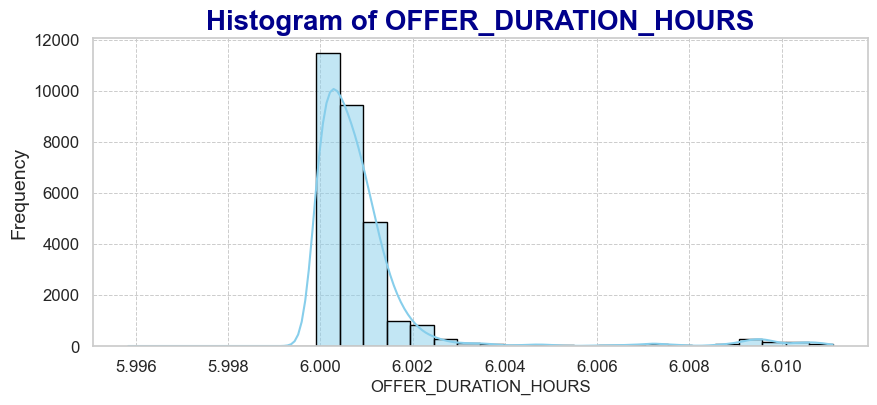

In [92]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 4))
sns.histplot(df_no_outliers_duration_hours['OFFER_DURATION_HOURS'], bins=30, kde=True, color="skyblue", edgecolor="black")

plt.title("Histogram of OFFER_DURATION_HOURS", fontsize=20, weight='bold', color='darkblue')
plt.xlabel("OFFER_DURATION_HOURS", fontsize=12)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

Con este gráfico queda muy claro que las promociones tienen (dejando de lado el caso aislado del outlier) alrededor de 6 horas de duración, es decir, es una variable que no varía para este universo de muestra que estamos observando.

### Variable OFFER_START_HOUR

In [96]:
df_offer['OFFER_START_HOUR'].value_counts(dropna = False)

OFFER_START_HOUR
13    14287
19    12884
7     12574
12     2226
17     1354
11     1268
15     1228
14      987
16      828
10      380
18      321
20      113
9        89
8        55
1        54
21       43
22       21
6        10
2         9
3         8
23        4
0         1
5         1
4         1
Name: count, dtype: int64

C:\Users\suzic\AppData\Local\Temp\ipykernel_13652\4204984078.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OFFER_START_HOUR', y='Frequency', data=category_counts, palette='muted')


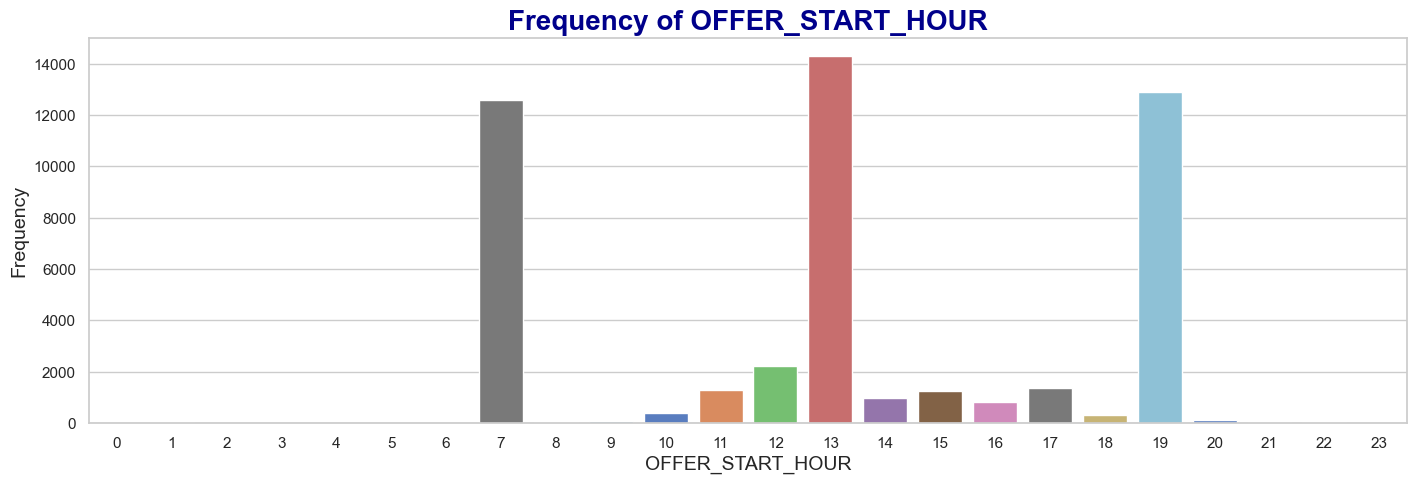

In [98]:
# Calcular la frecuencia de cada categoría
category_counts = df_offer['OFFER_START_HOUR'].value_counts().reset_index()
category_counts.columns = ['OFFER_START_HOUR', 'Frequency']

# Ordenar por frecuencia en orden descendente
category_counts = category_counts.sort_values(by='Frequency', ascending=False)

# Establecer el estilo estético de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para mostrar la frecuencia de cada categoría en orden descendente
plt.figure(figsize=(17, 5))
sns.barplot(x='OFFER_START_HOUR', y='Frequency', data=category_counts, palette='muted')

# Personalizar el título y las etiquetas
plt.title('Frequency of OFFER_START_HOUR', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('OFFER_START_HOUR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Mostrar el gráfico
plt.show()

Este gráfico nos permite ver que la mayoría de las promociones se lanzan a las 7 a.m., 1 p.m. y 7 p.m. Esta es una variable relevante para alinear el interés de compra con el público objetivo al que se ofrece el producto.

In [101]:
df_offer['OFFER_TYPE'].value_counts(dropna = False)

OFFER_TYPE
lightning_deal    48746
Name: count, dtype: int64

In [103]:
df_offer['ORIGIN'].value_counts(dropna = False)

ORIGIN
NaN    37430
A      11316
Name: count, dtype: int64

In [105]:
df_offer['SHIPPING_PAYMENT_TYPE'].value_counts(dropna = False)

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: count, dtype: int64

### Variable DOM_DOMAIN_AGG1

In [108]:
df_offer['DOM_DOMAIN_AGG1'].value_counts(dropna = False)

DOM_DOMAIN_AGG1
HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS            

C:\Users\suzic\AppData\Local\Temp\ipykernel_13652\3710425215.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DOM_DOMAIN_AGG1', y='Frequency', data=category_counts, palette='muted')


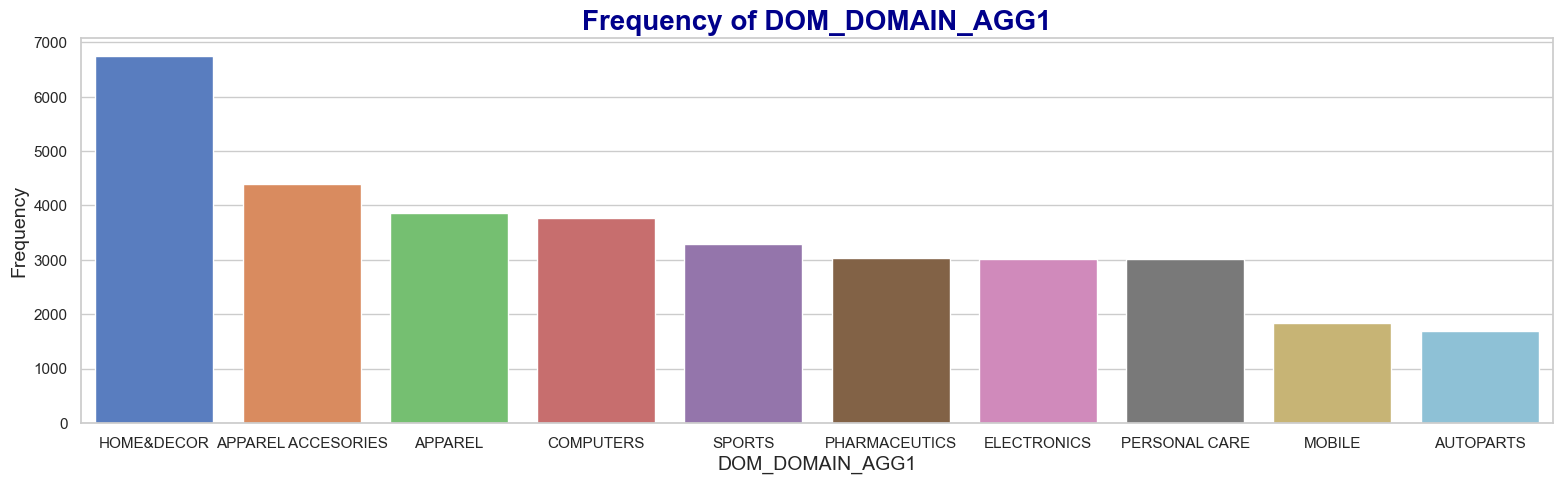

In [110]:
category_counts = df_offer['DOM_DOMAIN_AGG1'].value_counts().reset_index()
category_counts.columns = ['DOM_DOMAIN_AGG1', 'Frequency']

category_counts = category_counts.sort_values(by='Frequency', ascending=False)
category_counts = category_counts.head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(19, 5))
sns.barplot(x='DOM_DOMAIN_AGG1', y='Frequency', data=category_counts, palette='muted')

plt.title('Frequency of DOM_DOMAIN_AGG1', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('DOM_DOMAIN_AGG1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

Este gráfico muestra las 10 principales categorías que lanzan más promociones relámpago. Vemos que Home&Decor es la categoría que más promociones lanzó en estos 2 meses, con 6.742 promociones.

### Variable Vertical

In [114]:
df_offer['VERTICAL'].value_counts(dropna = False)

VERTICAL
APP & SPORTS       13241
HOME & INDUSTRY    11011
CE                  8629
BEAUTY & HEALTH     7150
CPG                 2714
T & B               2624
ACC                 2573
ENTERTAINMENT        525
OTHERS               279
Name: count, dtype: int64

C:\Users\suzic\AppData\Local\Temp\ipykernel_13652\62903599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VERTICAL', y='Frequency', data=category_counts, palette='muted')


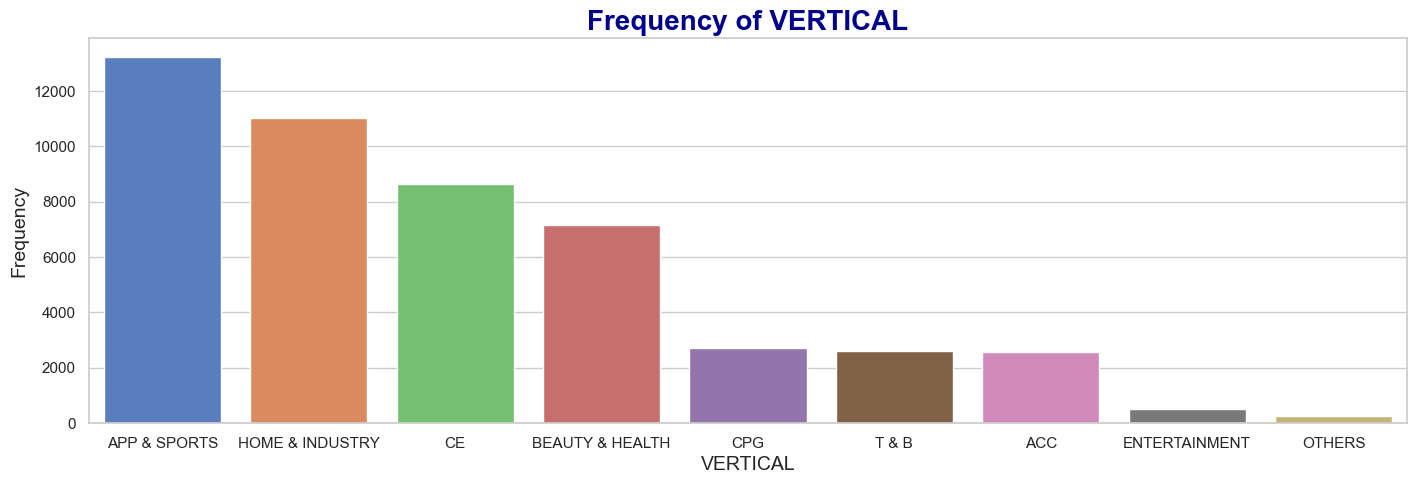

In [116]:
category_counts = df_offer['VERTICAL'].value_counts().reset_index()
category_counts.columns = ['VERTICAL', 'Frequency']

category_counts = category_counts.sort_values(by='Frequency', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(17, 5))
sns.barplot(x='VERTICAL', y='Frequency', data=category_counts, palette='muted')

plt.title('Frequency of VERTICAL', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('VERTICAL', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

Este gráfico muestra en orden descendente las verticales que lanzan más promociones relámpago. Vemos que APP & SPORT es la vertical que más promociones lanzó en estos 2 meses, con 13.241 promociones.

In [119]:
df_offer['DOMAIN_ID'].value_counts(dropna = False)

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: count, Length: 1266, dtype: int64

## Análisis Multivariado

In [158]:
def mode_agg(series):
    return series.mode()[0]

In [160]:
category_sales = df_offer.groupby('DOM_DOMAIN_AGG1').agg({'OFFER_START_HOUR': mode_agg}).reset_index()

In [162]:
category_sales

,DOM_DOMAIN_AGG1,OFFER_START_HOUR
0,ACC TOOLS,7
1,AGRO,19
2,ANTIQUES & HOBBIES,13
3,APPAREL,13
4,APPAREL ACCESORIES,13
5,AUTOPARTS,7
6,BABY,17
7,BATTERIES,7
8,BEAUTY EQUIPMENT,13
9,"BOOKS, MULTIMEDIA & OTHER E!",13


C:\Users\suzic\AppData\Local\Temp\ipykernel_9328\2998270884.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OFFER_START_HOUR', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')


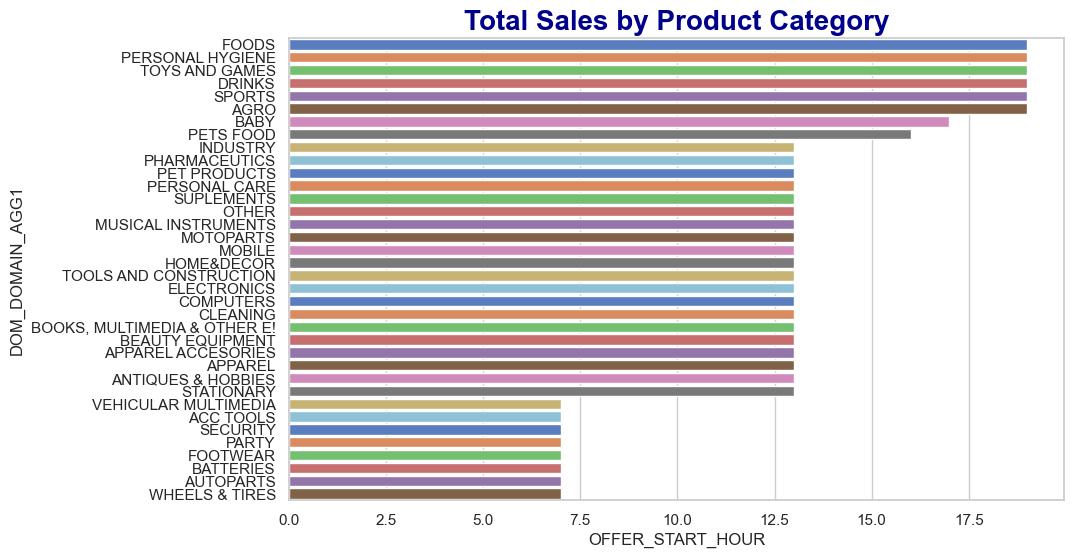

In [509]:
# Group by 'Product Category' and sum the sales
category_sales = df_offer.groupby('DOM_DOMAIN_AGG1').agg({'OFFER_START_HOUR': mode_agg}).reset_index()

# Sort the DataFrame by 'Sales' in descending order
category_sales = category_sales.sort_values(by='OFFER_START_HOUR', ascending=False)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='OFFER_START_HOUR', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')

# Customize the title and labels
plt.title('Total Sales by Product Category', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('OFFER_START_HOUR', fontsize=12)
plt.ylabel('DOM_DOMAIN_AGG1', fontsize=12)

# Show the plot
plt.show()

Este gráfico muestra la moda del horario en que comienzan las promociones en las diferentes categorías de productos. En las categorías de ALIMENTOS, HIGIENE PERSONAL, JUGUETES Y JUEGOS, BEBIDAS, DEPORTES y AGRO, las promociones generalmente se inician a las 19h. En INDUSTRIA, FARMACÉUTICA, CUIDADO PERSONAL y SUPLEMENTOS, las promociones comienzan alrededor de las 13h, y en MULTIMEDIA VEHICULAR, ACCESORIOS, SEGURIDAD, FIESTAS y CALZADO, el horario de inicio de las promociones es a las 7h de la mañana.

Categoria de productos que vende mayor percentage de estoque de la promoción:

C:\Users\suzic\AppData\Local\Temp\ipykernel_9328\416484846.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PERC_SOLD_QUANTITY', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')


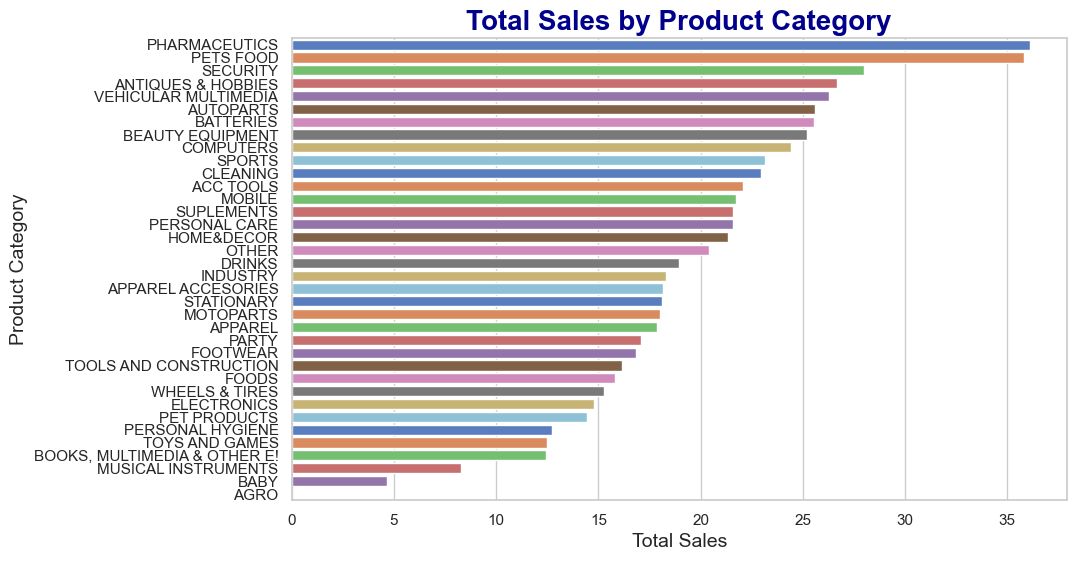

In [307]:
# Group by 'Product Category' and sum the sales
category_sales = df_offer.groupby('DOM_DOMAIN_AGG1')['PERC_SOLD_QUANTITY'].mean().reset_index()

# Sort the DataFrame by 'Sales' in descending order
category_sales = category_sales.sort_values(by='PERC_SOLD_QUANTITY', ascending=False)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PERC_SOLD_QUANTITY', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')

# Customize the title and labels
plt.title('Total Sales by Product Category', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Show the plot
plt.show()

Categorias de productos que mas genera estoque negativo después de la promoción:

C:\Users\suzic\AppData\Local\Temp\ipykernel_9328\3922759266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PERC_SOLD_QUANTITY', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')


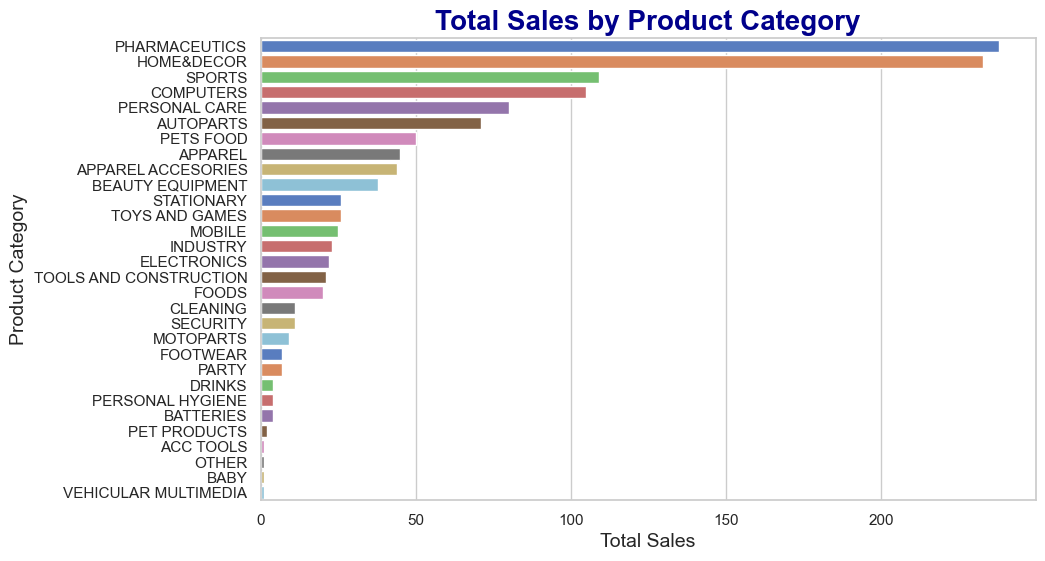

In [309]:
# Group by 'Product Category' and sum the sales
category_sales = df_offer.loc[df_offer['PERC_SOLD_QUANTITY']>100].groupby('DOM_DOMAIN_AGG1')['PERC_SOLD_QUANTITY'].count().reset_index()

# Sort the DataFrame by 'Sales' in descending order
category_sales = category_sales.sort_values(by='PERC_SOLD_QUANTITY', ascending=False)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PERC_SOLD_QUANTITY', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')

# Customize the title and labels
plt.title('Total Sales by Product Category', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Show the plot
plt.show()

Categoria de productos que genera mayor receita:

C:\Users\suzic\AppData\Local\Temp\ipykernel_9328\2576900761.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SOLD_AMOUNT', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')


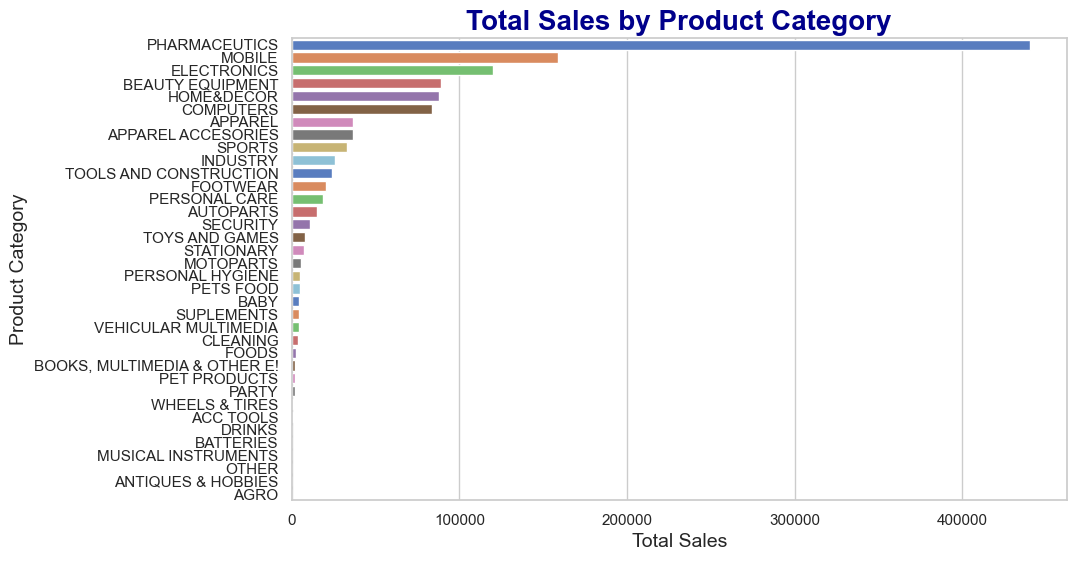

In [207]:
# Group by 'Product Category' and sum the sales
category_sales = df_offer.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
category_sales = category_sales.sort_values(by='SOLD_AMOUNT', ascending=False)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='SOLD_AMOUNT', y='DOM_DOMAIN_AGG1', data=category_sales, palette='muted')

# Customize the title and labels
plt.title('Total Sales by Product Category', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Show the plot
plt.show()

In [245]:
df_offer.groupby('OFFER_START_DATE')['SOLD_AMOUNT'].sum().reset_index().set_index('OFFER_START_DATE')

,SOLD_AMOUNT
OFFER_START_DATE,
2021-06-01,14991.12
2021-06-02,11428.76
2021-06-03,15695.98
2021-06-04,8765.48
2021-06-05,11494.70
...,...
2021-07-27,37541.02
2021-07-28,27510.98
2021-07-29,25614.30


In [251]:
df_offer.groupby(['OFFER_START_DATE', 'VERTICAL'])['SOLD_AMOUNT'].sum().reset_index().set_index('OFFER_START_DATE')

,VERTICAL,SOLD_AMOUNT
OFFER_START_DATE,,
2021-06-01,ACC,220.00
2021-06-01,APP & SPORTS,1604.70
2021-06-01,BEAUTY & HEALTH,5406.73
2021-06-01,CE,3880.74
2021-06-01,CPG,389.55
...,...,...
2021-07-31,CPG,324.80
2021-07-31,ENTERTAINMENT,82.54
2021-07-31,HOME & INDUSTRY,2761.40


In [253]:
pivot_table_offer = df_offer.pivot_table(index='OFFER_START_DATE', columns='VERTICAL', values='SOLD_AMOUNT', aggfunc='sum', fill_value=0)

In [255]:
pivot_table_offer

VERTICAL,ACC,APP & SPORTS,BEAUTY & HEALTH,CE,CPG,ENTERTAINMENT,HOME & INDUSTRY,OTHERS,T & B
OFFER_START_DATE,,,,,,,,,
2021-06-01,220.00,1604.70,5406.73,3880.74,389.55,24.00,3026.12,223.47,215.81
2021-06-02,62.56,1385.26,4251.56,3961.53,221.17,30.08,978.14,152.00,386.46
2021-06-03,208.37,1532.00,5874.64,5520.21,231.87,8.95,2103.22,43.80,172.92
2021-06-04,151.14,1191.05,3587.89,2341.11,127.93,164.93,989.84,45.00,166.59
2021-06-05,271.28,1355.50,3917.72,4030.33,230.25,23.19,1531.03,29.93,105.47
...,...,...,...,...,...,...,...,...,...
2021-07-27,1232.28,2936.14,20243.81,8901.70,212.32,0.00,3707.36,15.65,291.76
2021-07-28,655.57,2766.78,10154.86,8139.45,706.49,126.45,4703.62,30.35,227.41
2021-07-29,689.25,3406.60,5457.75,11170.76,162.57,69.80,4339.42,0.00,318.15


Tendencia de ventas de las promociones relâmpago en el periodo: 
En el grafico vemos una tendencia de crescimiento de la promociones relámpago en general

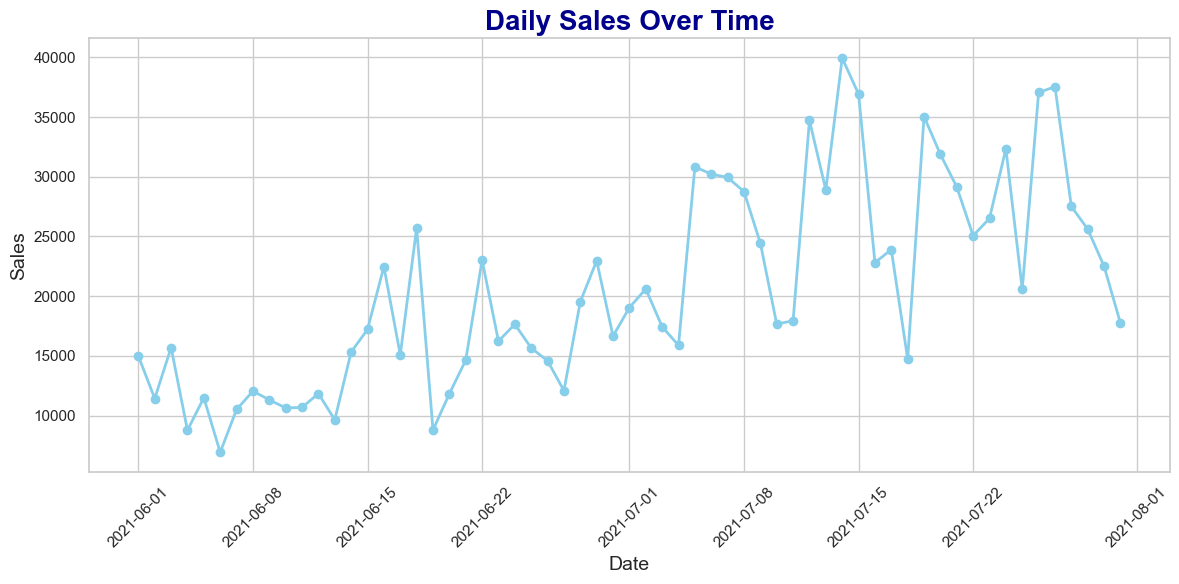

In [247]:
# Set the date as the index
df_serie = df_offer.groupby('OFFER_START_DATE')['SOLD_AMOUNT'].sum().reset_index().set_index('OFFER_START_DATE')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df_serie.index, df_serie['SOLD_AMOUNT'], marker='o', color='skyblue', linewidth=2)

# Customize the title and labels
plt.title('Daily Sales Over Time', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Customize the x-ticks to show date labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

Tendencia de ventas de las verticales:
- Vemos una tendência de cresciminento grande en Beauty & Health y CE. Hay un crescimiento pequeño en Home & Industry y App & Sports. and las otras verticales se mantivieron estables y con menor parcitipación en ventas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


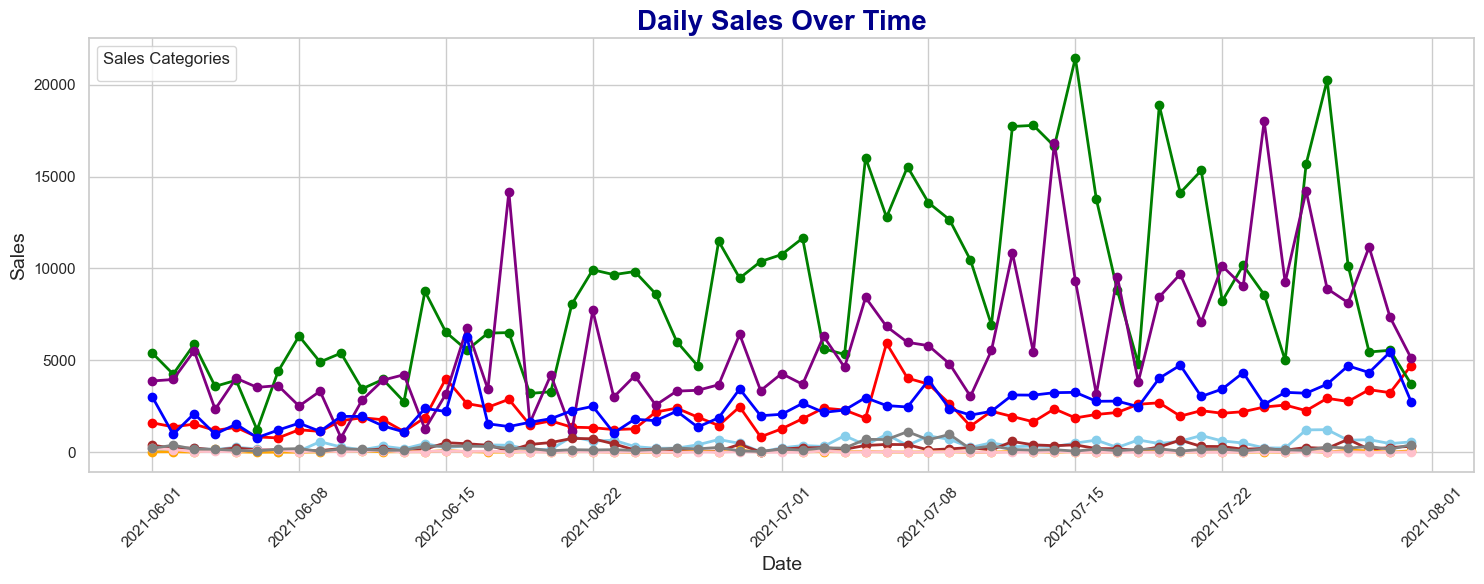

In [273]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a time series plot
plt.figure(figsize=(15, 6))
plt.plot(pivot_table_oferta.index, pivot_table_oferta['ACC'], marker='o', color='skyblue', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['APP & SPORTS'], marker='o', color='red', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['BEAUTY & HEALTH'], marker='o', color='green', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['CE'], marker='o', color='purple', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['CPG'], marker='o', color='brown', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['ENTERTAINMENT'], marker='o', color='orange', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['HOME & INDUSTRY'], marker='o', color='blue', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['OTHERS'], marker='o', color='pink', linewidth=2)
plt.plot(pivot_table_oferta.index, pivot_table_oferta['T & B'], marker='o', color='gray', linewidth=2)
						
# Customize the title and labels
plt.title('Daily Sales Over Time', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Add a legend
plt.legend(title='Sales Categories', loc='upper left')  # loc can be changed to place the legend differently

# Customize the x-ticks to show date labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

## Conclusión: 

Con los insights generados, es posible concluir que tenemos un historial de 2 meses de promociones relámpago en los meses de junio y julio de 2021, totalizando 48,746 promociones. La duración de estas promociones no varía tanto y es de 6 horas. El horario de lanzamiento de las promociones es lo que varía; algunas se inician a las 7h, otras a las 13h y otras a las 19h. En muchas de las promociones (casi 250,000) vemos que ningún artículo se vende; cuando hay artículos vendidos, la frecuencia más recurrente es del 20% del stock liquidado (aproximadamente 5,000 promociones). Solo el 2.5% de las promociones exceden el stock destinado para ellas, ocasionando un stock negativo del producto. Generalmente, el stock de estas promociones involucra cantidades entre 5 y 15 unidades. 

Las categorías de productos que más tienen promociones son:
- HOME&DECOR 
- APPAREL ACCESORIES
- APPAREL
- COMPUTERS 
- SPORTS

Categoria de productos que vende mayor percentage de estoque de la promoción son:
- Pharmaceutical
- Pets Food
- Security
- Antiques & Hobbies
- Veicular Multimedia

Categorias de productos que mas genera estoque negativo después de la promoción:
- Pharmaceutical
- Home & Decor
- Sports
- Computers
- Personal Care

Categoria de productos que genera mayor ingreso:
- Pharmaceutical
- Mobile
- Electronics
- Beauty Equipments
- Home & Decor

O sea la categoría Pharmaceutical tiene sido muy bien sucedida en las promociones, en general mas de 35% el estoque es liquidado en ellas. Las promociones empiezan en das 13h y generan mucho ingreso. Mucha de las vezes tambien genera estoque negativo, entonces talvez sea interesante analisar la posibilidad de diminuir la duracion de la promocion para los productos en los cuales este fenómeno ocurre.

Las categorías de productos que general muchas promociones, pero el estoque no es liquidado, sería importante repensar el horario de inicio de la promocion y la duración de la promoción.